In [5]:
%matplotlib inline

import sys
import os
import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import data

In [6]:
#!pip install opencv-python

In [7]:
camera = data.camera()

In [8]:
camera

array([[156, 157, 160, ..., 152, 152, 152],
       [156, 157, 159, ..., 152, 152, 152],
       [158, 157, 156, ..., 152, 152, 152],
       ...,
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111]], dtype=uint8)

In [9]:
type(camera)

numpy.ndarray

In [10]:
camera.shape

(512, 512)

In [11]:
camera.size

262144

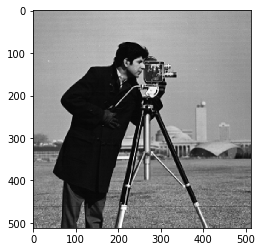

In [12]:
plt.imshow(camera, 'gray')

In [13]:
camera.min()

0

In [14]:
camera.max()

255

In [15]:
camera.mean()

118.31400299072266

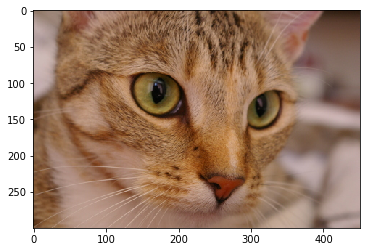

In [37]:
cat = data.chelsea()

red_cat = cat.copy()
plt.imshow(red_cat)

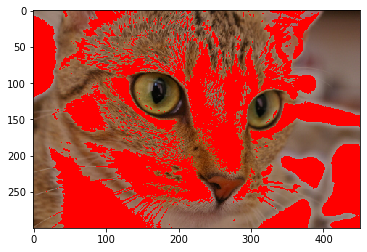

In [40]:
# choosing all pixels that have a red signal and
# just emphasizing that red color
mask = cat[:, :, 0] > 160
red_cat[mask] = [255, 0, 0]
plt.imshow(red_cat)

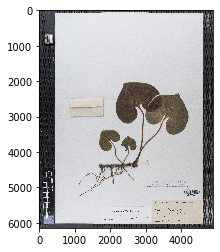

In [26]:
from skimage import io

img = io.imread("leaf-ex.jpg")
plt.imshow(img)

In [17]:
img.shape

(6144, 4912, 3)

In [18]:
# the third element indicates red, blue, green lens
#plt.imshow(img[:,:,2]) 
#plt.title("Leaf Image")
# to remove the excess text when plotting
#plt.axis('off');

In [19]:
avg = img.mean()
avg

img.max()

255

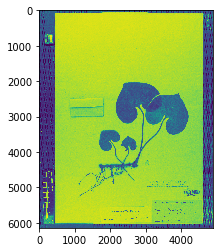

In [25]:
# convert to RGB
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)

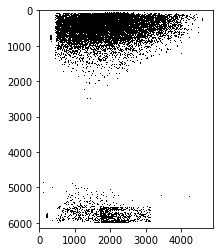

In [21]:
# create a binary thresholded image
_, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
# show it
plt.imshow(binary, cmap="gray")
plt.show()

## Canny Edge Detection Algorithm
1. Noise Reduction
2. Gradient calculation 
3. Non-maximum suppression
4. Double Threshold
5. Edge Tracking by Hysteresis

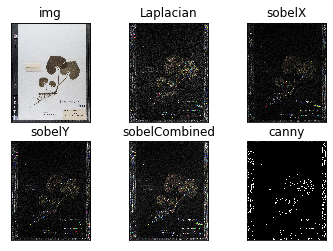

In [34]:
canny = cv2.Canny(img, 50, 200)
lap = cv2.Laplacian(img, cv2.CV_64F, ksize = 3)
# uint = unsigned integer
lap = np.uint8(np.absolute(lap))

sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

titles = ['img', 'Laplacian', 'sobelX', 'sobelY', 'sobelCombined', 'canny']
images = [img, lap, sobelX, sobelY, sobelCombined, canny]
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()